# 1/ Loading data into dataframes

In [175]:
import pandas as pd

red_wine_df = pd.read_csv("DATA/winequality-red.csv",sep=";")
white_wine_df = pd.read_csv("DATA/winequality-white.csv",sep=";")

In [176]:
print(red_wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


# 2/ Pre-processing data

In [177]:
# Function that renames column names to the standard form
def fix_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return

# rename column names
fix_column_names(red_wine_df)
fix_column_names(white_wine_df)

In [178]:
# add wine_type for 2 df
red_wine_df["wine_type"] = "red"
white_wine_df["wine_type"] = "white"

In [179]:
# concat 2 df
all_wines = pd.concat([red_wine_df,white_wine_df])

In [180]:
# re-shuffer records to randomize data points
all_wines = all_wines.sample(frac=1,random_state=42).reset_index(drop=True)

In [181]:
# add feature "quality_label"
def make_quality_label(x):
    if x<6:
        return "low"
    elif x<8:
        return "medium"
    else:
        return "high"
all_wines["quality_label"] = all_wines.quality.apply(make_quality_label)


In [182]:
all_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [183]:
all_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


# 3/ Exploring data

In [184]:
# get names of all numerical attributes
import numpy as np
numerical_attribute_names = all_wines.select_dtypes(np.number).columns
numerical_attribute_names

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

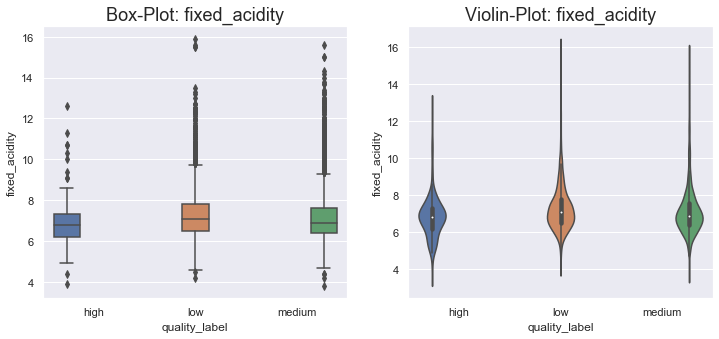

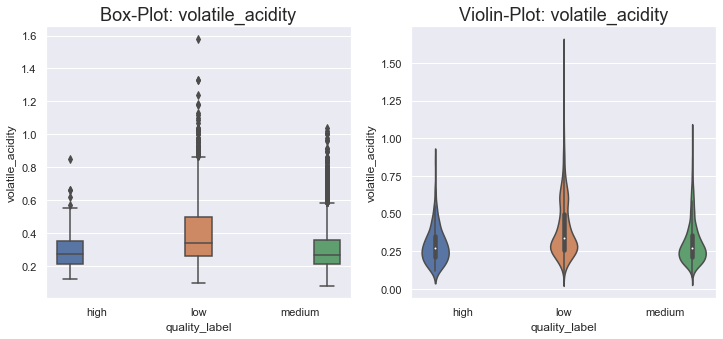

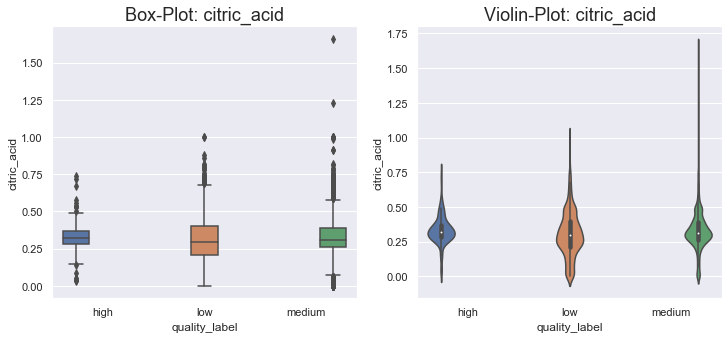

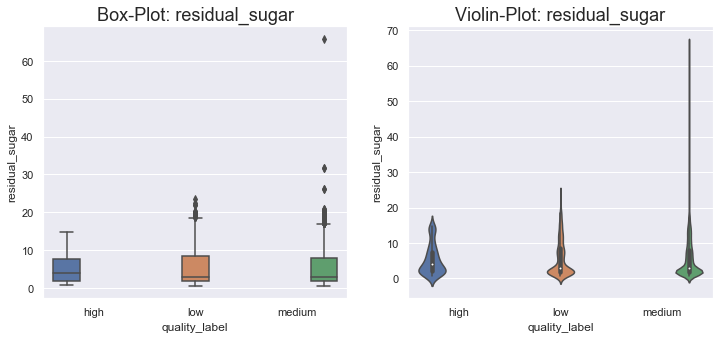

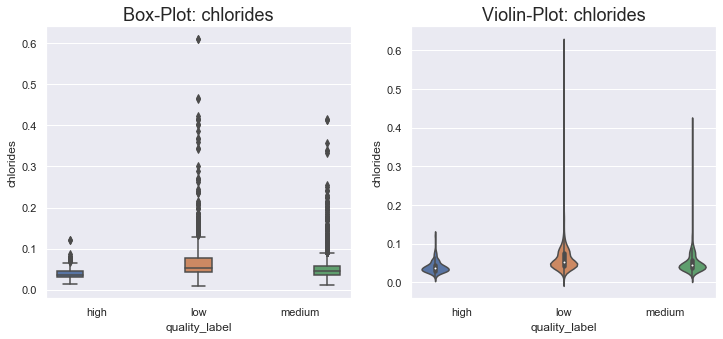

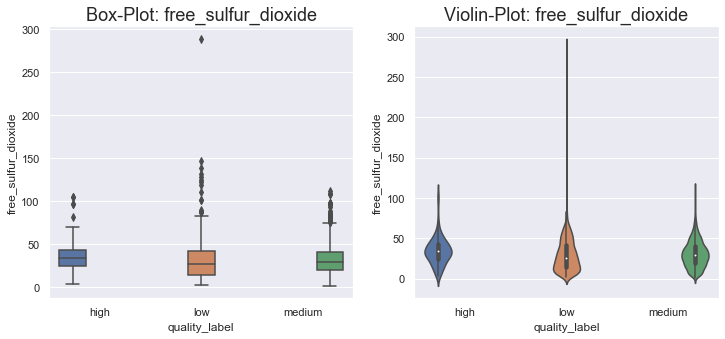

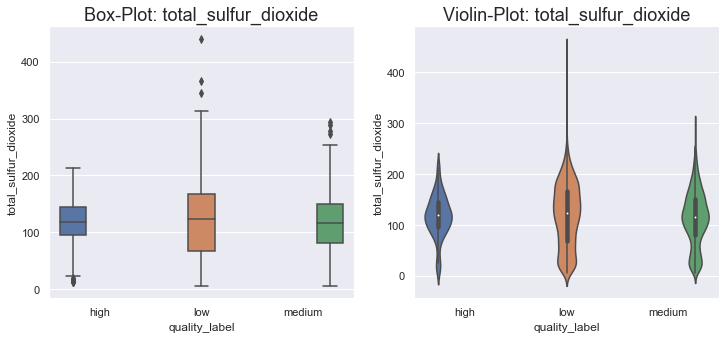

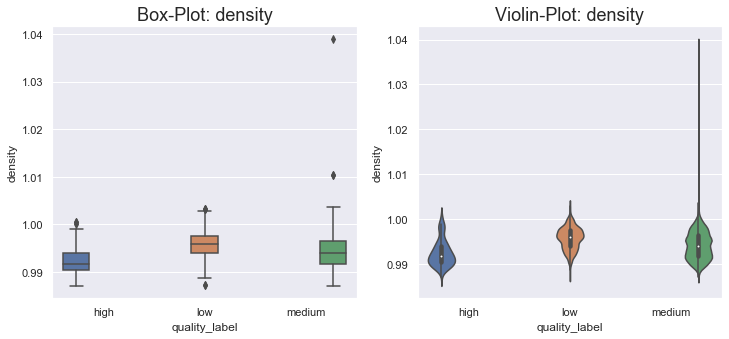

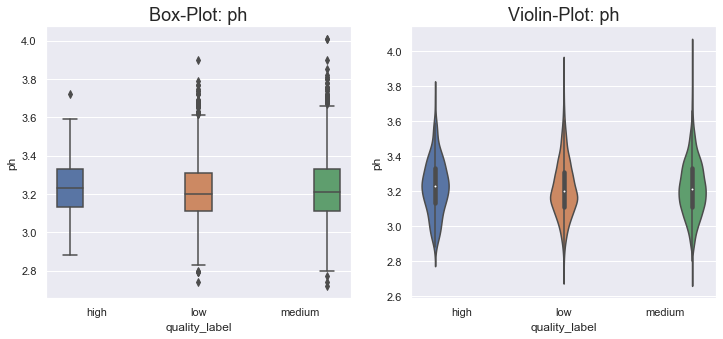

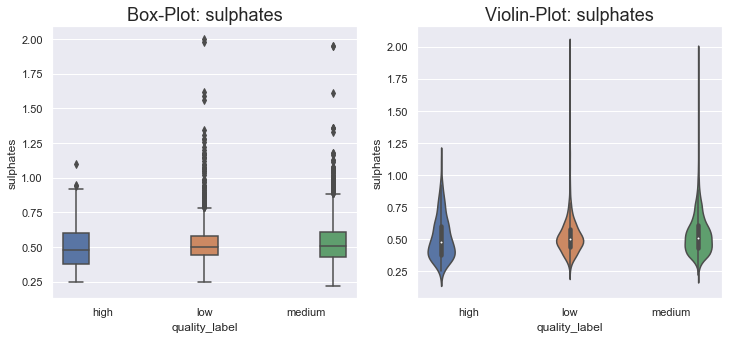

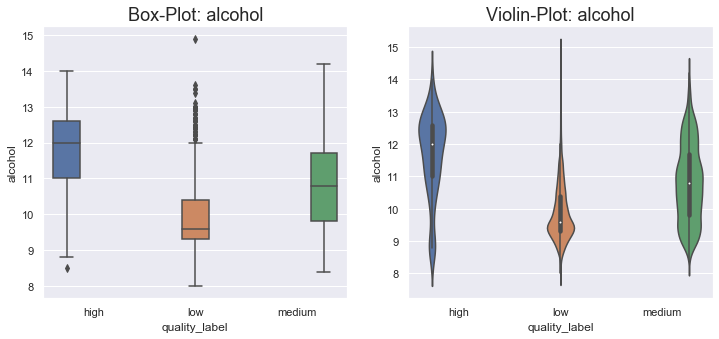

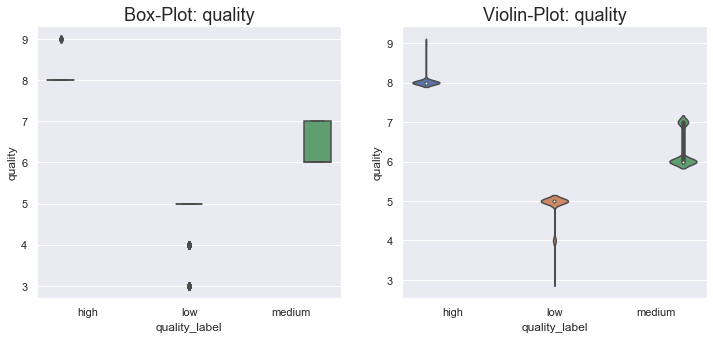

In [190]:
# display box-plots anf violin-plots for each numerical attribute, grouped by the "quality_label"
import ultility_tools as utt
for num_att in numerical_attribute_names:
    utt.plot_boxvio_one_att(all_wines,num_att,"quality_label")


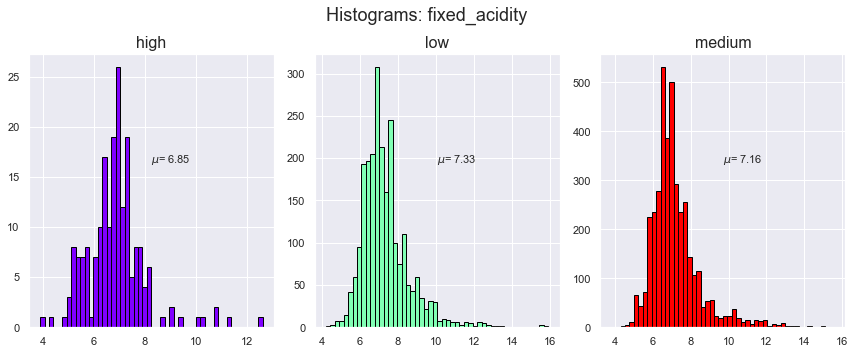

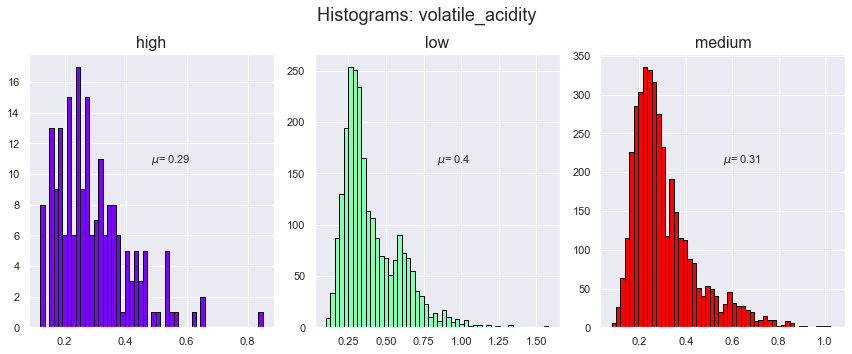

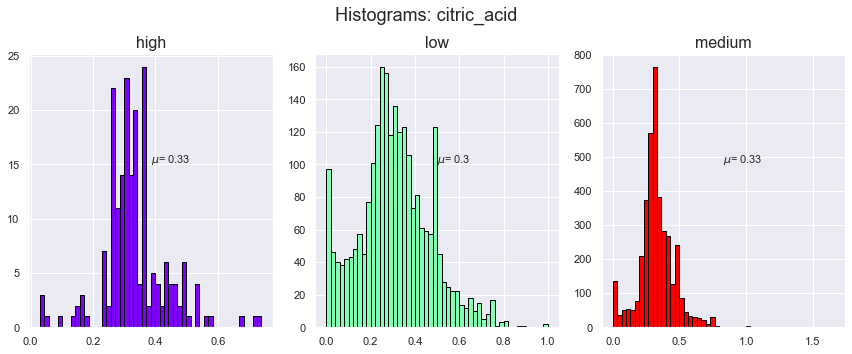

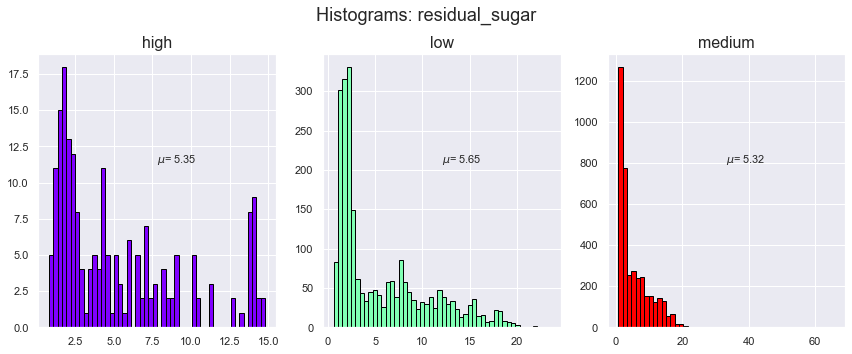

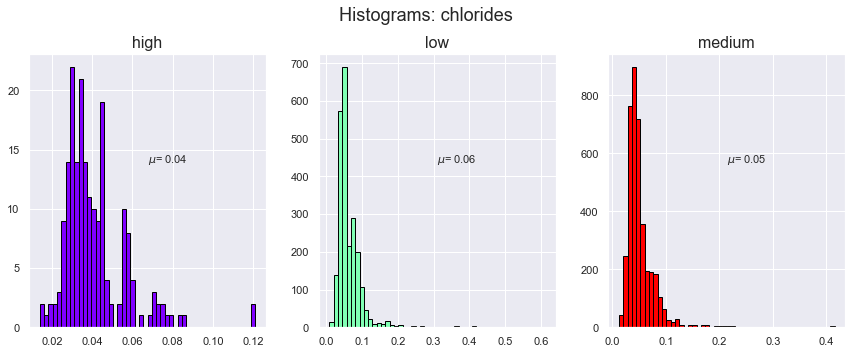

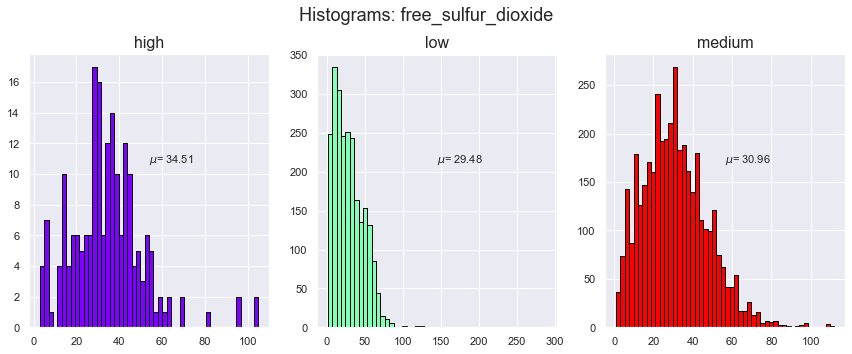

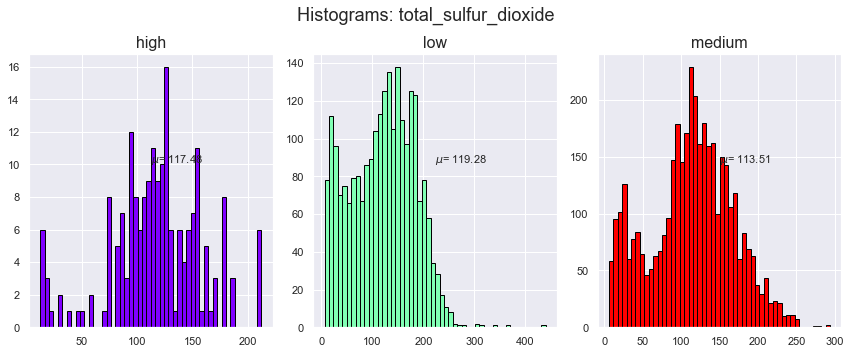

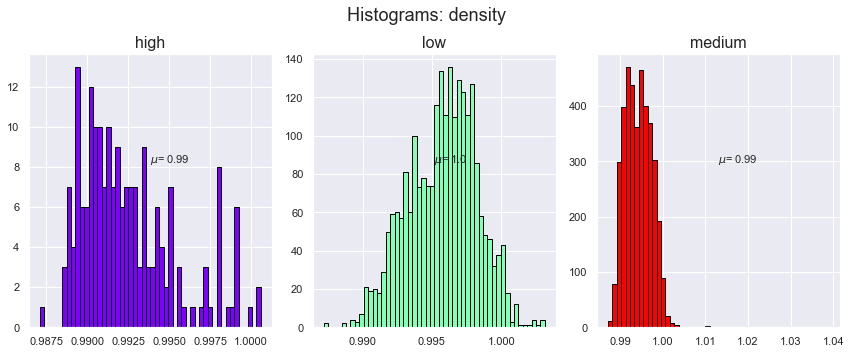

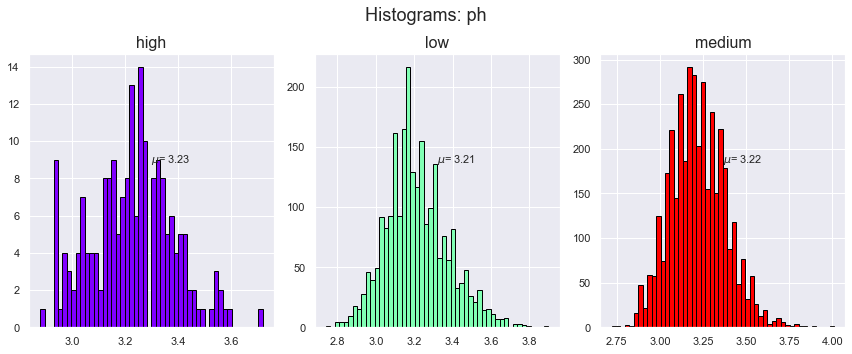

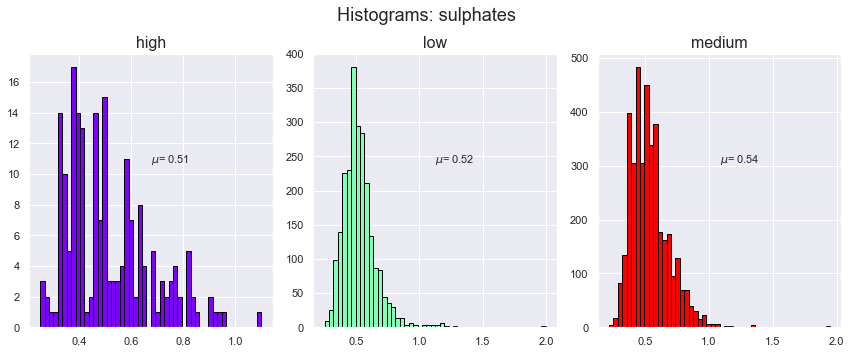

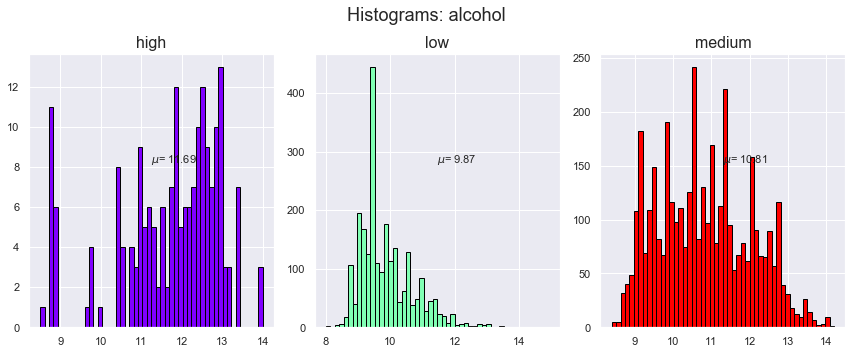

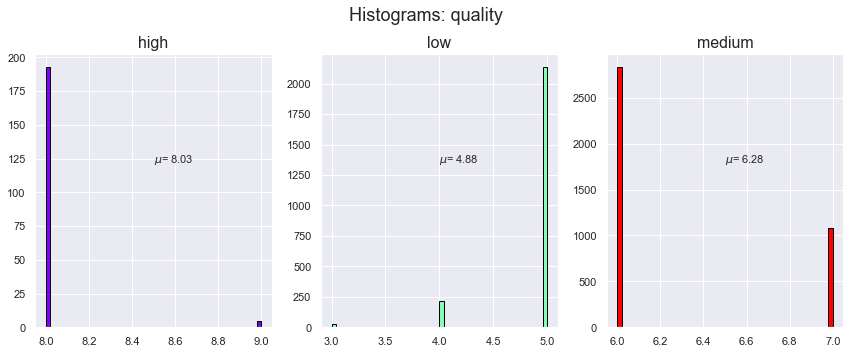

In [191]:
# display histogram-plots for each numerical attribute, grouped by the "quality_label"
for num_att in numerical_attribute_names:
    utt.plot_hist_attributes(all_wines,num_att,"quality_label")
